@article{Pilgrim2021, 
         doi = {10.21105/joss.03859}, 
         url = {https://doi.org/10.21105/joss.03859}, 
         year = {2021}, publisher = {The Open Journal}, 
         volume = {6}, 
         number = {68}, 
         pages = {3859}, 
         author = {Charlie Pilgrim}, 
         title = {piecewise-regression (aka segmented regression) in Python}, 
         journal = {Journal of Open Source Software} 
        }

In [1]:
# General-level imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Special-case libraries/modules
import piecewise_regression

# Personal/local libraries and module imports
import reg


In [2]:
path = f"data{os.sep}"
filenames = ["phys_data_2023-03-12_side0.csv",
            "simulated_event_profiles.csv",
            "solo_ept_sun_e.csv"]

index_col_names = ["TimeUTC",
                  "datetime",
                  "datetime"]

index = 2

df = pd.read_csv(f"{path}{filenames[index]}", parse_dates=True, index_col=index_col_names[index])

display(df)

,E0,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,E24,E25,E26,E27,E28,E29,E30,E31,E32,E33
datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-20 00:00:30.451561,NaN,610.8765,0.0000,2319.62160,831.95230,403.3569,0.00000,577.58466,457.06552,219.21864,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,37.866673,45.647266,50.158504,0.00000
2022-01-20 00:01:30.451561,NaN,1221.7530,0.0000,927.84863,415.97614,403.3569,299.53607,577.58466,0.00000,0.00000,...,51.61536,0.000000,0.000000,38.311687,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2022-01-20 00:02:30.451561,NaN,1221.7530,491.7059,927.84863,0.00000,806.7138,0.00000,0.00000,228.53276,0.00000,...,0.00000,0.000000,43.441692,0.000000,0.000000,0.000000,0.000000,45.647266,0.000000,60.36797
2022-01-20 00:03:30.451561,NaN,0.0000,983.4118,463.92432,1663.90450,1210.0707,0.00000,577.58466,228.53276,0.00000,...,0.00000,46.115623,0.000000,38.311687,0.000000,35.854694,0.000000,45.647266,0.000000,0.00000
2022-01-20 00:04:30.451561,NaN,610.8765,983.4118,1391.77300,831.95230,1210.0707,599.07214,577.58466,228.53276,438.43730,...,0.00000,0.000000,0.000000,38.311687,0.000000,0.000000,0.000000,45.647266,50.158504,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-21 23:55:30.451561,NaN,2443.5060,983.4118,2319.62160,1247.92830,1210.0707,599.07214,1443.96150,0.00000,438.43730,...,51.61536,92.231250,86.883385,0.000000,79.480675,35.854694,37.866673,136.941800,100.317010,120.73594
2022-01-21 23:56:30.451561,NaN,1832.6294,1966.8236,1855.69730,415.97614,2016.7845,299.53607,1443.96150,457.06552,657.65594,...,51.61536,46.115623,0.000000,38.311687,79.480675,35.854694,75.733345,136.941800,50.158504,482.94376
2022-01-21 23:57:30.451561,NaN,1221.7530,2458.5295,927.84863,1247.92830,2823.4985,1497.68030,577.58466,1142.66380,438.43730,...,154.84608,46.115623,130.325070,38.311687,0.000000,71.709390,75.733345,45.647266,250.792510,0.00000


Index(['E0', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
       'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20',
       'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29', 'E30',
       'E31', 'E32', 'E33'],
      dtype='object')
359
1
['E1']
[-1]
2022-01-20 12:00:00
126451.4375


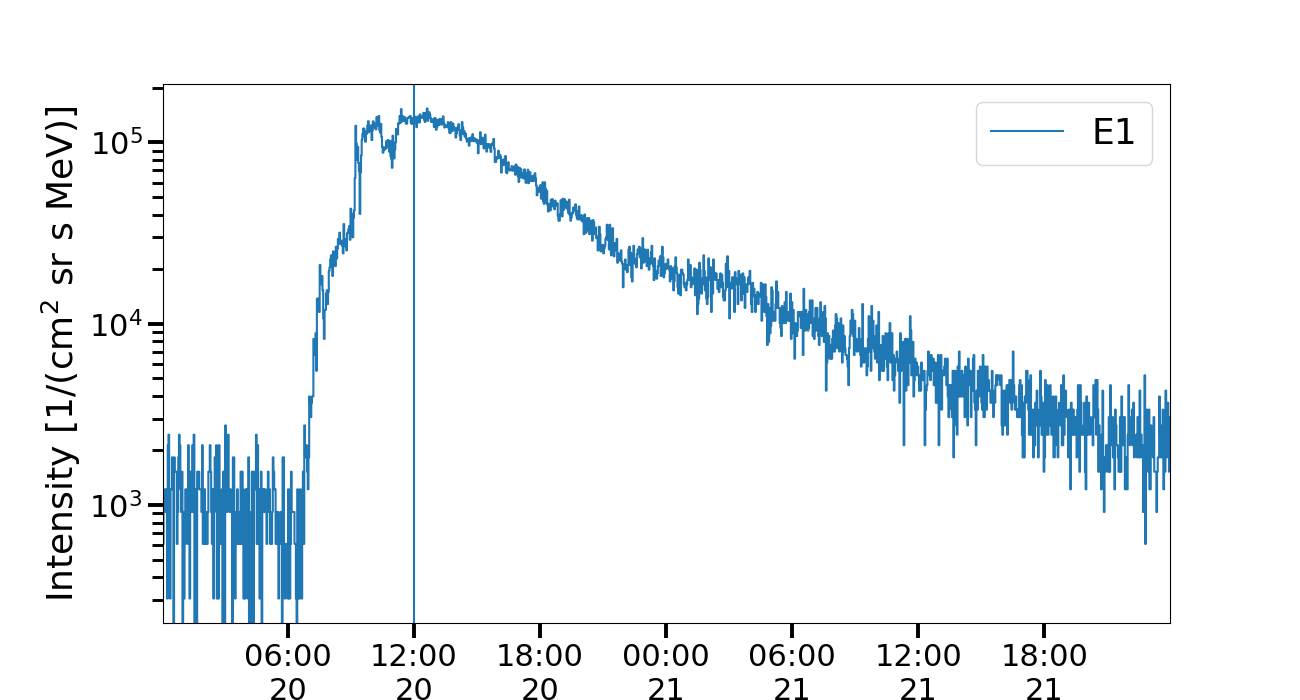

In [4]:
event = reg.Reg(data=df)

channel = "E1"
%matplotlib ipympl
event.quicklook(channel=channel, resample="2 min", selection="2022-01-20 12:00")

In [9]:
print(event.selection_max_x)
print(event.selection_max_y)
print(pd.to_datetime(event.selection_max_x, unit='m')) #+pd.Timedelta(event.data.index[0]))

2022-01-20 12:00:00
211.28789
2022-01-20 12:00:00


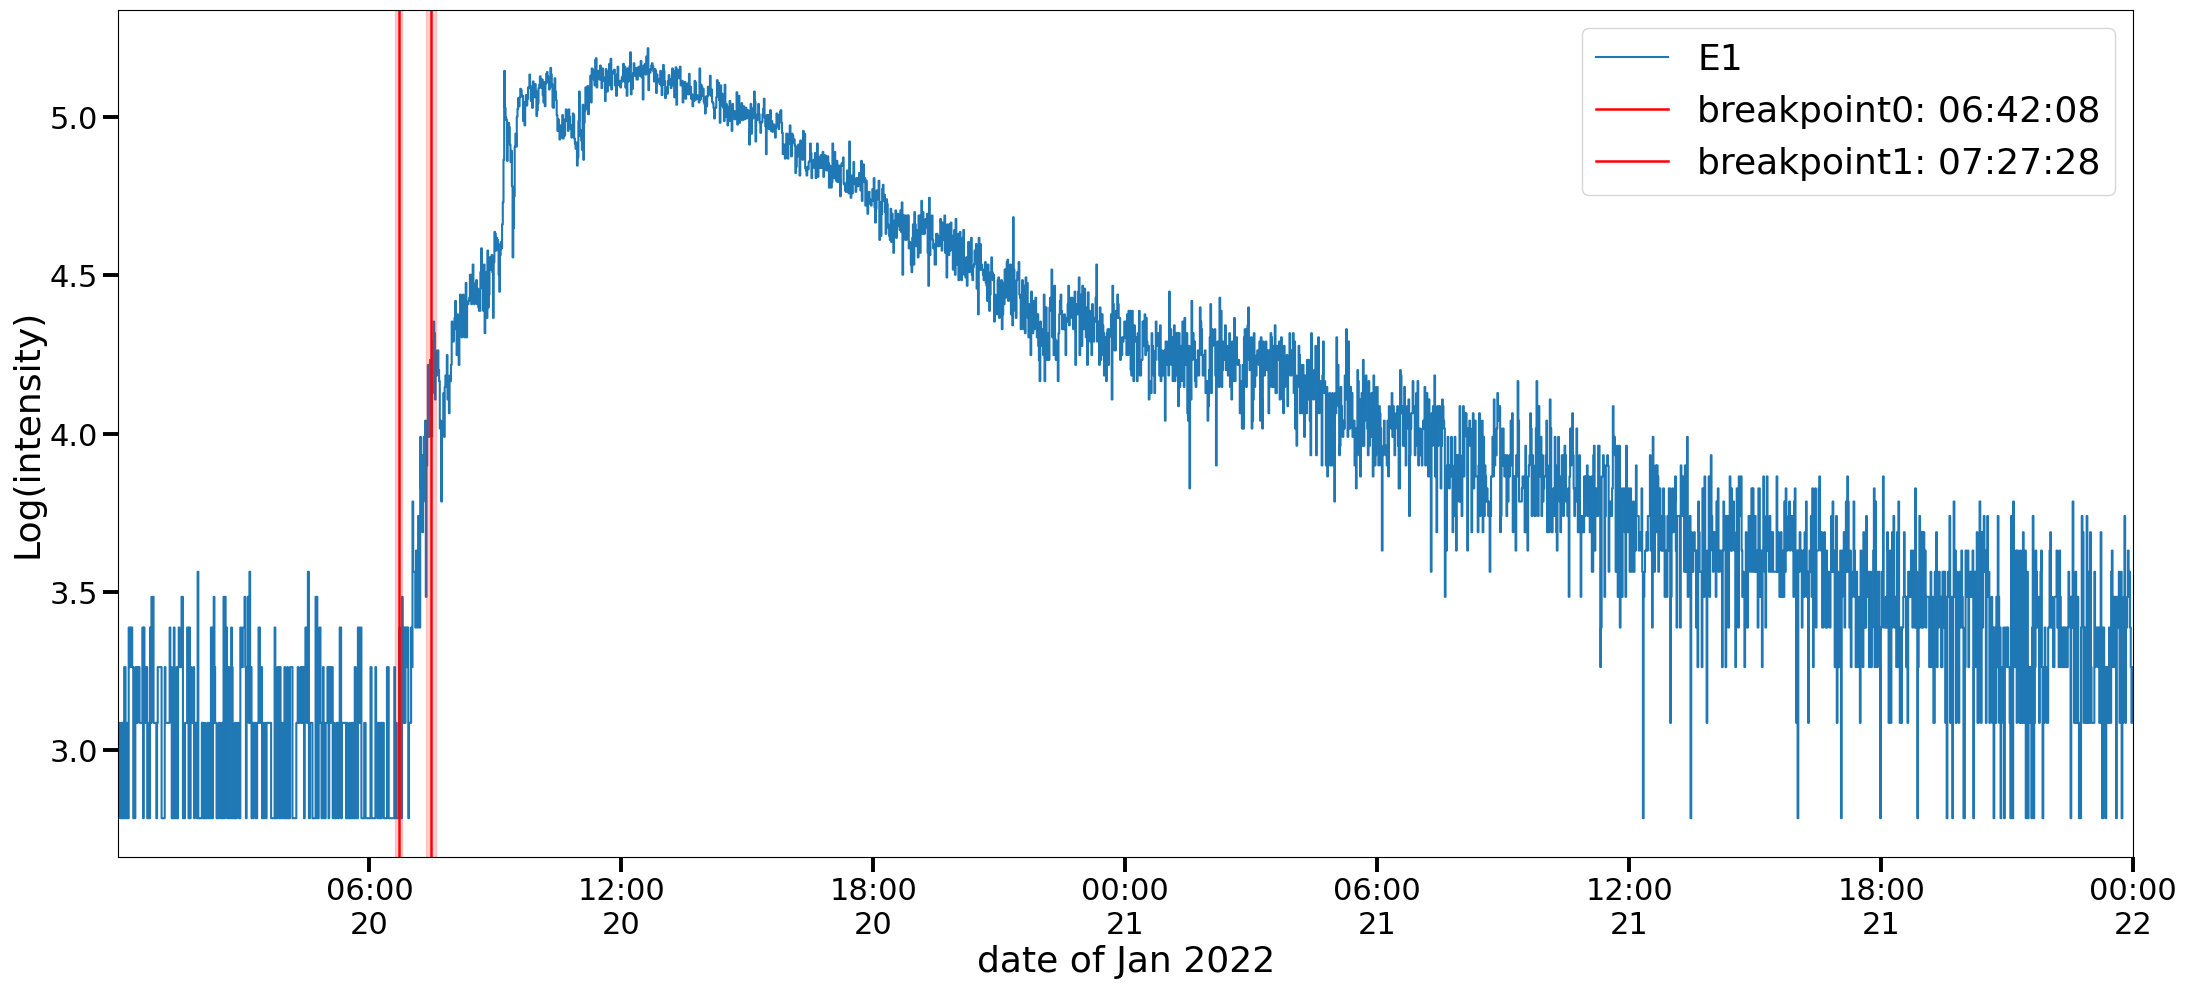

In [15]:
%matplotlib inline
results  = reg.workflow(data=df, channel="E1", window=30, threshold=5, diagnostics=False, breaks=2,
                              index_choice="time_s", resample="1 min", plot_style="step")

In [14]:
results

{'const': np.float64(10313.244435897803),
 'alpha0': np.float64(-6.276581103510187e-06),
 'alpha1': np.float64(0.00042050547156981553),
 'alpha2': np.float64(8.627811021122477e-05),
 'breakpoint0': Timestamp('2022-01-20 06:42:08.631402254'),
 'breakpoint1': Timestamp('2022-01-20 07:27:28.504887341'),
 'breakpoint0_errors': (Timestamp('2022-01-20 06:37:04.977228403'),
  Timestamp('2022-01-20 06:47:12.285576105')),
 'breakpoint1_errors': (Timestamp('2022-01-20 07:20:19.706887960'),
  Timestamp('2022-01-20 07:34:37.302886724')),
 'series': datetime
 2022-01-20 00:01:00.451561    2.785953
 2022-01-20 00:02:00.451561    3.086983
 2022-01-20 00:03:00.451561    3.086983
 2022-01-20 00:05:00.451561    2.785953
 2022-01-20 00:06:00.451561    3.086983
                                 ...   
 2022-01-20 09:08:00.451561    4.605497
 2022-01-20 09:09:00.451561    4.585294
 2022-01-20 09:10:00.451561    4.661015
 2022-01-20 09:11:00.451561    4.730436
 2022-01-20 09:12:00.451561    4.865135
 Name: E

In [5]:
import ipympl
%matplotlib ipympl

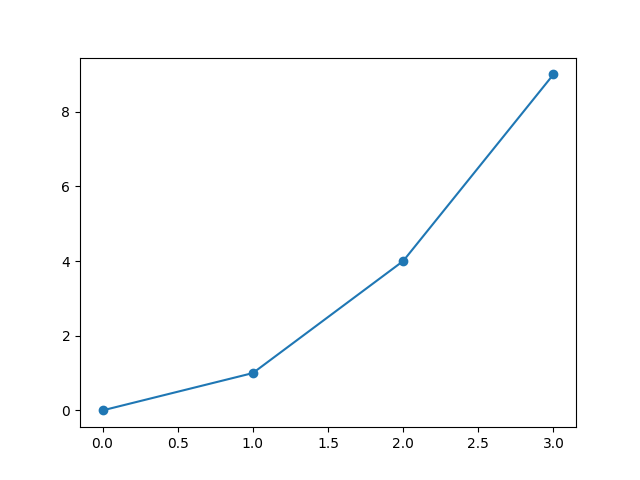

Collected coordinates: []


In [14]:
class ClickablePlot:
    def __init__(self):
        self.clicked_coords = []  # Store clicked points
        self.fig, self.ax = plt.subplots()
        self.ax.plot([0, 1, 2, 3], [0, 1, 4, 9], marker='o')
        self.fig.canvas.mpl_connect('button_press_event', self.onclick)

    def onclick(self, event):
        """Store coordinates when clicked."""
        if event.xdata is not None and event.ydata is not None:
            self.clicked_coords.append((event.xdata, event.ydata))
            print(f"Clicked at: ({event.xdata:.2f}, {event.ydata:.2f})")
        self.ax.axvline(x=self.clicked_coords[-1][0])

    def show(self):
        """Display the plot."""
        plt.show()

    def get_coords(self):
        """Retrieve stored coordinates."""
        return self.clicked_coords

plot = ClickablePlot()
plot.show()
print("Collected coordinates:", plot.get_coords())

In [15]:
plot.get_coords()

[]